#### Predecir el precio de un terreno segun sus metros cuadrados

In [1]:
#Importar las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
#Crear el conjuntos de datos
data = {
    'm2_terreno':[50,60,70,80,100,120],
    'precio':[15000,18000,23000,28000,35000,50000]
}
#convertir a un dataframe
df = pd.DataFrame(data)

In [3]:
#preparacion de los datos
X = df[['m2_terreno']]
y = df['precio']

In [4]:
#Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
# Obtenemos los coeficientes del modelo
# Intercepto (b0) y Pendiente (b1)
intercepto = modelo.intercept_
pendiente = modelo.coef_[0]
#Imprimir la informacion de los coeficientes
print('Informacion de los coeficientes: ')
print(f'Intercepto: {intercepto:.2f}\nPendiente: {pendiente:.2f} ')

Informacion de los coeficientes: 
Intercepto: -10892.16
Pendiente: 488.24 


In [6]:
#Predecir nuevas medidas para obtener su precio
nuevos_m2 = np.array([[90],[110],[130],[150]]).reshape(-1,1)
predicciones = modelo.predict(nuevos_m2)
print('\nPredicciones de los precios nuevos segun los m2 del terreno')



Predicciones de los precios nuevos segun los m2 del terreno


c:\Users\monti.UNITY12\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
print("### Predicciones para Terrenos Nuevos ###")
for area, precio in zip(nuevos_m2.flatten(), predicciones):
    print(f'Area: {area} m2 -> Precio Predicho: $ {precio:.2f}')

### Predicciones para Terrenos Nuevos ###
Area: 90 m2 -> Precio Predicho: $ 33049.02
Area: 110 m2 -> Precio Predicho: $ 42813.73
Area: 130 m2 -> Precio Predicho: $ 52578.43
Area: 150 m2 -> Precio Predicho: $ 62343.14


In [8]:
#   MÉTRICAS DEL MODELO
# =======================

y_pred = modelo.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("\n### Métricas del Modelo ###")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")



### Métricas del Modelo ###
R²: 0.9802
MAE: 1261.44
MSE: 2727124.18
RMSE: 1651.40


c:\Users\monti.UNITY12\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))


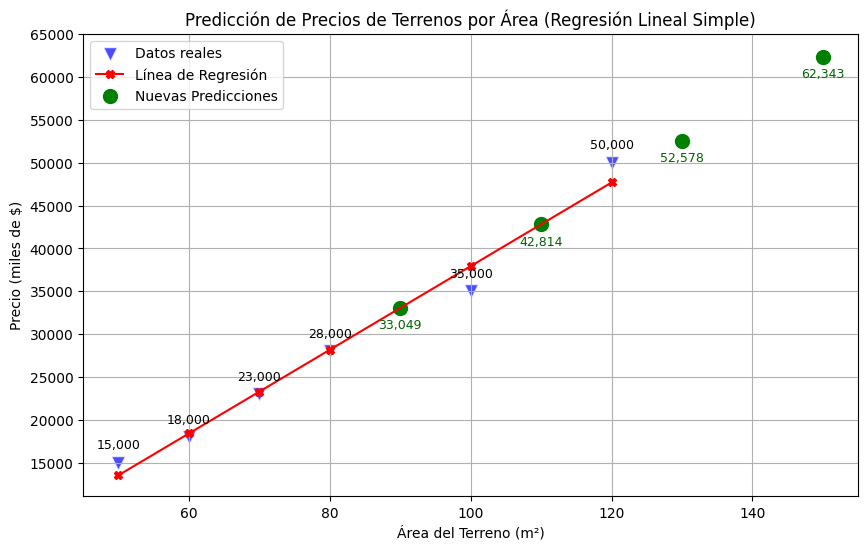

In [9]:
#graficar los datos reales, y las predicciones
# 4. Visualización de los Resultados
plt.figure(figsize=(10, 6))

# Puntos de datos reales
plt.scatter(X, y, color='blue', marker='v', label='Datos reales', s=100, alpha=0.7, edgecolors='w')
#Añadir etiquetas a los datos reales
for i, txt in enumerate(y):
    plt.annotate(f'{txt:,.0f}',(X.iloc[i],y.iloc[i]), textcoords='offset points', xytext=(0,10), ha='center', fontsize=9)
# Línea de regresión ajustada
plt.plot(X, modelo.predict(X), color='red', marker='X', label='Línea de Regresión')
# Puntos predichos
plt.scatter(nuevos_m2, predicciones, color='green', marker='o', s=100, label='Nuevas Predicciones')
# Añadir etiquetas para las nuevas predicciones
for i, txt in enumerate(predicciones):
    plt.annotate(f'{txt:,.0f}', (nuevos_m2[i, 0], predicciones[i]), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='darkgreen')

plt.title('Predicción de Precios de Terrenos por Área (Regresión Lineal Simple)')
plt.xlabel('Área del Terreno (m²)')
plt.ylabel('Precio (miles de $)')
plt.legend()
plt.yticks(np.arange(15000, 70000, 5000))
plt.grid(True)
# Guardar la gráfica como imagen
plt.savefig('grafica_precio_vs_m2.png', dpi=300)  # Puedes cambiar el nombre y formato
plt.show()

In [10]:
# --- Unir los dos DataFrames ---
df_pred = pd.DataFrame({
    'm2_predicho': nuevos_m2.flatten(),
    'precio_predicho': predicciones
})

# 1. Renombrar las columnas de df_real para que el merge sea más claro.
df.rename(columns={'m2_terreno': 'm2_terreno', 'precio': 'Precio_Real'}, inplace=True)

# 2. Crear un DataFrame para las predicciones que usaremos para la unión.
df_pred.rename(columns={'m2_predicho': 'm2_terreno', 'precio_predicho': 'Precio_Predicho'}, inplace=True)

# 3. Unir los DataFrames usando merge externo para incluir todas las filas.
# Usamos 'm2_terreno' como la clave de unión implícita.
df_unificado = pd.merge(
    df.assign(Precio_Predicho=np.nan),  # Agrega columna Predicción a Reales con NaN
    df_pred.assign(Precio_Real=np.nan),       # Agrega columna Real a Predicciones con NaN
    on='m2_terreno', 
    how='outer'
)

# 4. Consolidar las columnas de precio:
# Las columnas del merge tienen sufijos (_x, _y), las combinamos.
# Para simplificar, haremos la unión por índice después de estandarizar las columnas:

# Mejor y más simple: crear una lista de todos los m2 y todos los precios
all_m2 = np.concatenate([df['m2_terreno'].values, df_pred['m2_terreno'].values])
all_precios = np.concatenate([df['Precio_Real'].values, np.full(len(df_pred), np.nan)]) # Llenar precio real con NaN
all_predicciones = np.concatenate([modelo.predict(df[['m2_terreno']]), df_pred['Precio_Predicho'].values]) # Predicciones de entrenamiento + nuevas predicciones

# Crear el DataFrame final
df_final = pd.DataFrame({
    'm2_terreno': all_m2,
    'Precio_Real': all_precios,
    'Precio_Estimado_Modelo': all_predicciones
})

# Ordenar por m2_terreno para mejor visualización
df_final.sort_values(by='m2_terreno', inplace=True)
df_final.reset_index(drop=True, inplace=True)
df_final

,m2_terreno,Precio_Real,Precio_Estimado_Modelo
0,50,15000.0,13519.607843
1,60,18000.0,18401.960784
2,70,23000.0,23284.313725
3,80,28000.0,28166.666667
4,90,NaN,33049.019608
5,100,35000.0,37931.372549
6,110,NaN,42813.725490
7,120,50000.0,47696.078431
8,130,NaN,52578.431373
9,150,NaN,62343.137255
